### **Linear Regression**

In [ ]:
import numpy as np
 
#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
 
#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

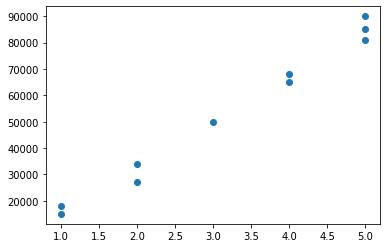

In [ ]:
# menampilkan scatter plot dari dataset
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.scatter(bedrooms, house_price)

In [ ]:
from sklearn.linear_model import LinearRegression
 
# latih model dengan Linear Regression.fit()
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression()

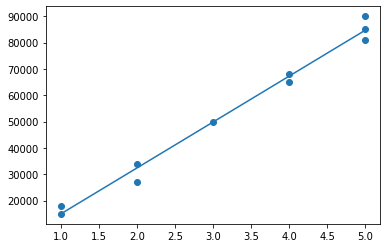

In [ ]:
# menampilkan plot hubungan antara jumlah kamar dengan harga rumah
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

### **Logistic Regression**

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df=df.drop(columns='User ID')

In [ ]:
df=pd.get_dummies(df)
df

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [ ]:
predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = df[predictions]
y = df['Purchased'] 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled_data=StandardScaler().fit(X).transform(X)
scaled_data=pd.DataFrame(scaled_data, columns=X.columns)
scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [ ]:
from sklearn.model_selection import train_test_split

X_test,X_train,y_test,y_train=train_test_split(scaled_data,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression().fit(X_train,y_train)

In [ ]:
model.score(X_test, y_test)

0.834375

### **K-Means**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Mall_Customers.xls')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
df=df.rename(columns={'Gender':'gender', 'Age':'age',
                      'Annual Income (k$)':'annual_income',
                      'Spending Score (1-100)':'spending_score'})

df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [ ]:
X = df.drop(['CustomerID', 'gender'],axis=1)

clusters = []
for i in range (1,11):
    km=KMeans(n_clusters=i).fit(X)

    clusters.append(km.inertia_)

Text(0, 0.5, 'inertia')

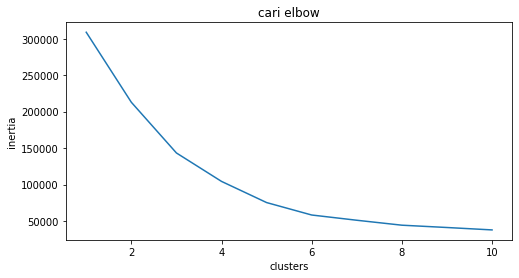

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('cari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


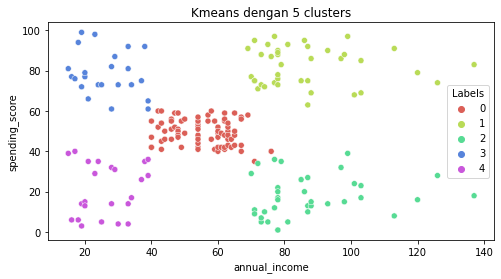

In [ ]:
km5=KMeans(n_clusters=5).fit(X)

X['Labels']=km5.labels_

plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'],X['spending_score'],hue=X['Labels'],
                palette=sns.color_palette('hls',5))
plt.title('Kmeans dengan 5 clusters')
plt.show()

### **Principal Component Analysis (PCA)**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.decomposition import PCA

In [ ]:
iris = datasets.load_iris()
atribut = iris.data
label = iris.target

X_train, X_test, y_train, y_test = train_test_split(atribut, label, test_size=0.1)

In [ ]:
decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(X_train, y_train)
model_pertama.score(X_test, y_test)

0.8666666666666667

In [ ]:
pca=PCA(n_components=4)

pca_attributes = pca.fit_transform(X_train)

pca.explained_variance_ratio_

array([0.92831258, 0.04843057, 0.01787177, 0.00538509])

In [ ]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [ ]:
model2 = decision_tree.fit(X_train_pca, y_train)
model2.score(X_test_pca, y_test)

0.8666666666666667

### **SVM**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
X=df[df.columns[:8]]
y=df['Outcome']

In [ ]:
X=StandardScaler().fit(X).transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clf=SVC().fit(X_train,y_train)

In [ ]:
clf.score(X_test, y_test)

0.7559055118110236

### **SVR**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Salary_Data.csv')

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
X=df['YearsExperience']
y=df['Salary']

X=X[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


In [ ]:
model = SVR(C=1000, gamma=0.5, kernel='rbf').fit(X,y)

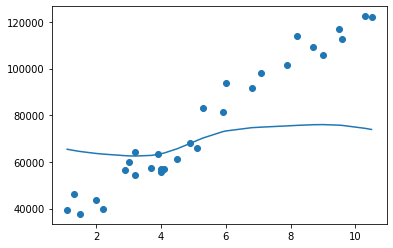

In [ ]:
plt.scatter(X,y)
plt.plot(X, model.predict(X))

### **SVR** **Hypertuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [ ]:
X=df['YearsExperience']
y=df['Salary']

X=X[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


In [ ]:
model = SVR()
parameters = {'kernel':['rbf'],
              'C':[1000,10000,100000],
              'gamma':[0.5,0.05,0.0005]}

grid_search=GridSearchCV(model, parameters)

grid_search.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.0005], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.05, 'kernel': 'rbf'}


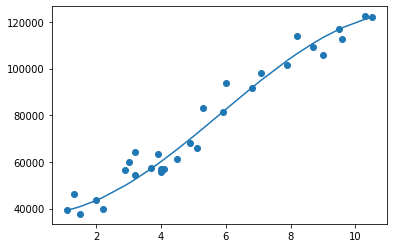

In [ ]:
new_model=SVR(C=100000,gamma=0.05,kernel='rbf').fit(X,y)
plt.scatter(X,y)
plt.plot(X, new_model.predict(X))

### **Tensorflow**

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-06-26 16:45:32--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  5.60MB/s    in 12s     

2021-06-26 16:45:46 (5.54 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [6]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [11]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir,'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  # direktori data latih
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4,
    # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
    class_mode='binary'
    )

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
    class_mode='binary'
    )

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [20]:
model.fit(
     train_generator,
     steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
     epochs=20, # tambahkan eposchs jika akurasi model belum optimal
     validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
     validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
     verbose=2
)

Epoch 1/20
25/25 - 8s - loss: 0.7341 - accuracy: 0.5000 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 7s - loss: 0.6829 - accuracy: 0.7000 - val_loss: 0.5971 - val_accuracy: 0.6500
Epoch 3/20
25/25 - 7s - loss: 0.6465 - accuracy: 0.7300 - val_loss: 0.5927 - val_accuracy: 0.7000
Epoch 4/20
25/25 - 7s - loss: 0.6160 - accuracy: 0.6400 - val_loss: 0.7488 - val_accuracy: 0.5500
Epoch 5/20
25/25 - 7s - loss: 0.6599 - accuracy: 0.6700 - val_loss: 0.5407 - val_accuracy: 0.7500
Epoch 6/20
25/25 - 7s - loss: 0.5210 - accuracy: 0.8100 - val_loss: 0.4914 - val_accuracy: 0.7500
Epoch 7/20
25/25 - 7s - loss: 0.6190 - accuracy: 0.7300 - val_loss: 0.5686 - val_accuracy: 0.6500
Epoch 8/20
25/25 - 7s - loss: 0.5442 - accuracy: 0.7700 - val_loss: 0.4946 - val_accuracy: 0.7000
Epoch 9/20
25/25 - 7s - loss: 0.5951 - accuracy: 0.7100 - val_loss: 0.4398 - val_accuracy: 0.8000
Epoch 10/20
25/25 - 7s - loss: 0.5613 - accuracy: 0.6900 - val_loss: 0.5269 - val_accuracy: 0.7500
Epoch 11/20
25/25 -

Saving WhatsApp Image 2021-06-27 at 00.19.02.jpeg to WhatsApp Image 2021-06-27 at 00.19.02 (1).jpeg
WhatsApp Image 2021-06-27 at 00.19.02.jpeg
clean


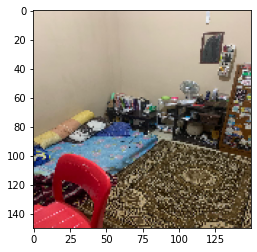

In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img=image.load_img(path, target_size=(150,150))
    imgplot=plt.imshow(img)
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes==0:
        print('clean')

    else:
        print('messy')